<a href="https://colab.research.google.com/github/mmkeyes140/ai_learning/blob/main/neural_network_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make Predictions with a Neural Network

In [ ]:
# Initial imports
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Generation and Preprocessing

In [ ]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, random_state=1)

In [ ]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)

In [ ]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Target'] = y

df.head()

,Feature 1,Feature 2,Target
0,-3.058373,4.488258,0
1,-8.609739,-3.727149,1
2,1.371297,5.231074,0
3,-9.339176,-2.954447,1
4,-11.571786,-3.852755,1


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

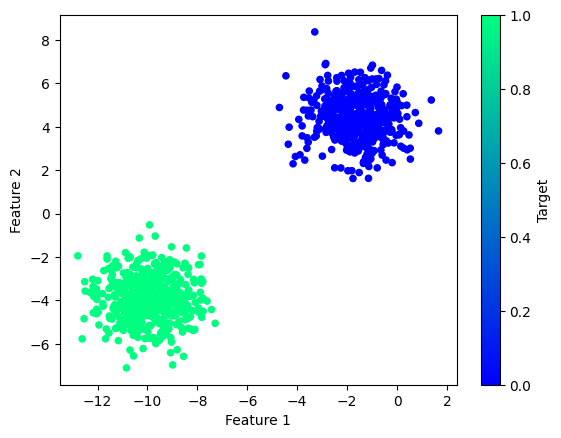

In [ ]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create scaler instance
scaler = StandardScaler()

# Fit the scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train = pd.DataFrame(X_scaler.transform(X_train))
X_test = pd.DataFrame(X_scaler.transform(X_test))

X_test.head()

,0,1
0,1.347957,1.003797
1,0.889623,1.245628
2,0.981772,1.102287
3,-0.888027,-1.032606
4,-1.119879,-1.028622


## Creating a Neural Network Model

In [ ]:
# Create a sequential neural network model
neuron = Sequential()

In [ ]:
# Add the input and the hidden layer to the model
number_inputs = 2
number_hidden_nodes = 1
neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [ ]:
# Add the output layer
number_classes = 1
neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [ ]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiling a Neural Network Model

In [ ]:
# Compile the model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fitting and Testing a Neural Network

In [ ]:
# Fitting the model
model = neuron.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.9880
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.9920
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.9933
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.9973
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.9973
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.9987
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.9987
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.9987
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.9987
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 1.0000
Epoch 11/

## Plotting Loss and Accuracy

In [ ]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<Axes: >

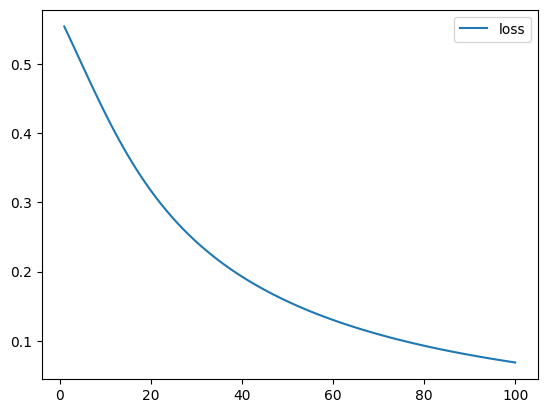

In [ ]:
# Plot the loss
df.plot(y="loss")


<Axes: >

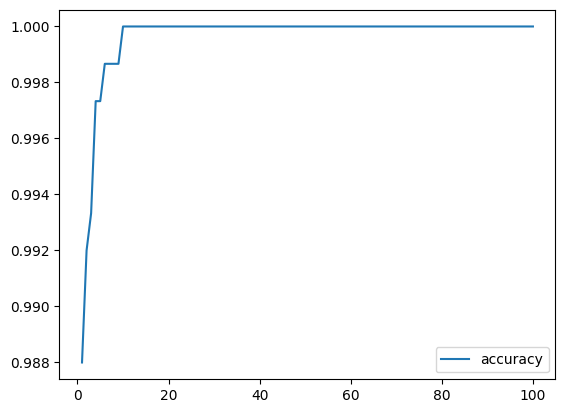

In [ ]:
# Plot the accuracy
df.plot(y="accuracy")

### Evaluating the Model Performance

In [ ]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0641 - accuracy: 1.0000 - 176ms/epoch - 22ms/step
Loss: 0.0640796422958374, Accuracy: 1.0


## Making Predictions with a Neural Network Model

In [ ]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples = 10, centers = 2, n_features = 2, random_state = 1)

In [ ]:
# Making predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32")
print(predictions)


1/1 [==============================] - 0s 93ms/step
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
# Create a DataFrame to compare the predictions with the actual values
df_neuron_predict = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
df_neuron_predict.head(10)

,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0
